In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import graphviz

In [2]:
df = pd.read_csv('/Users/mehakklunkar/Downloads/ML Study Material/employee_data.csv')
print(df.head())

   avg_monthly_hrs   department  filed_complaint  last_evaluation  n_projects  \
0              221  engineering              NaN         0.932868           4   
1              232      support              NaN              NaN           3   
2              184        sales              NaN         0.788830           3   
3              206        sales              NaN         0.575688           4   
4              249        sales              NaN         0.845217           3   

   recently_promoted  salary  satisfaction    status  tenure  
0                NaN     low      0.829896      Left     5.0  
1                NaN     low      0.834544  Employed     2.0  
2                NaN  medium      0.834988  Employed     3.0  
3                NaN     low      0.424764  Employed     2.0  
4                NaN     low      0.779043  Employed     3.0  


**Data Exploration & Visualization:**

In [3]:
df.shape

(14249, 10)

In [4]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [5]:
df['filed_complaint'].fillna(0, inplace=True)
df['recently_promoted'].fillna(0, inplace=True)

print(df[['filed_complaint', 'recently_promoted']].isnull().sum())

filed_complaint      0
recently_promoted    0
dtype: int64


In [6]:
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1532
n_projects              0
recently_promoted       0
salary                  0
satisfaction          181
status                  0
tenure                181
dtype: int64

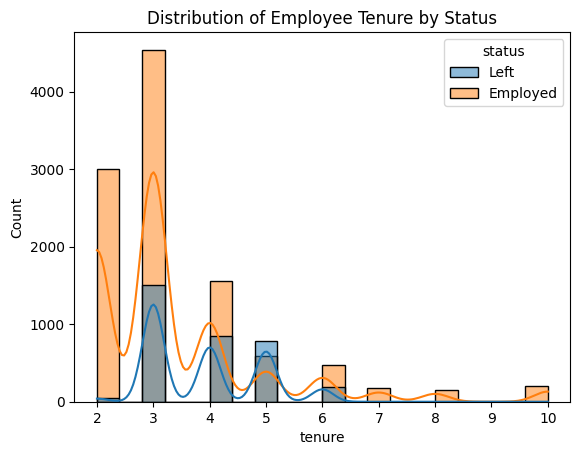

In [7]:
sns.histplot(data=df, x='tenure', hue='status', kde=True, bins=20)
plt.title('Distribution of Employee Tenure by Status')
plt.show()

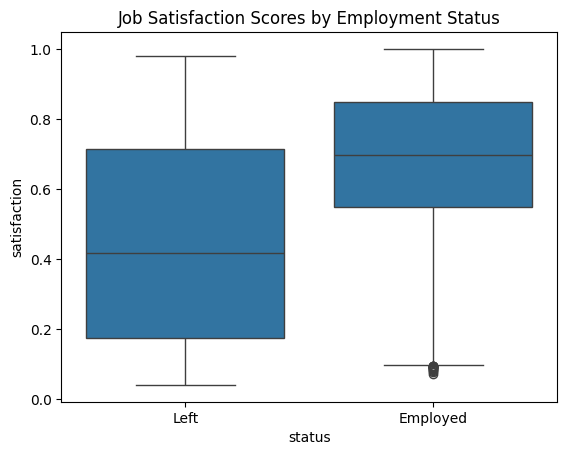

In [8]:
sns.boxplot(data=df, x='status', y='satisfaction')
plt.title('Job Satisfaction Scores by Employment Status')
plt.show()

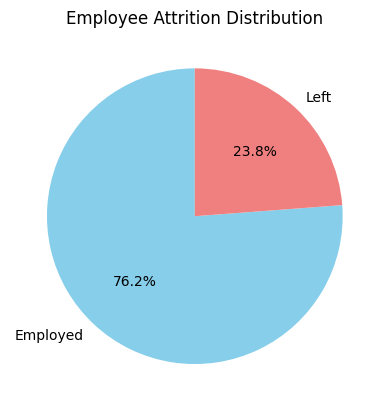

In [9]:
attrition_distribution = df['status'].value_counts()
plt.pie(attrition_distribution, labels=attrition_distribution.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Employee Attrition Distribution')
plt.show()

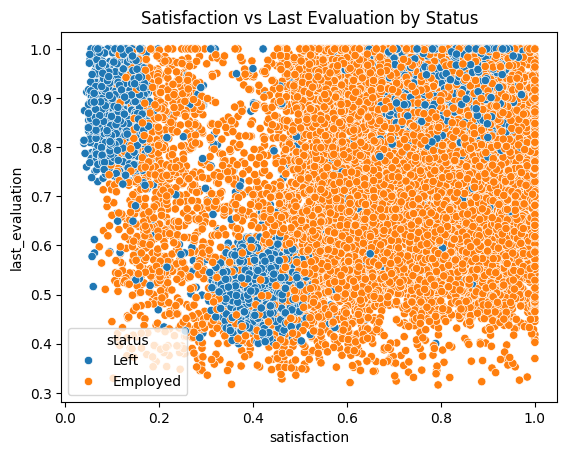

In [10]:
sns.scatterplot(data=df, x='satisfaction', y='last_evaluation', hue='status')
plt.title('Satisfaction vs Last Evaluation by Status')
plt.show()

**Converting Categorical to Numerical Value:**

In [11]:
df = pd.get_dummies(df, columns=['department', 'salary'], drop_first=True)
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
df.head()

/var/folders/mc/vj385n_x69j69tt44nwxffdc0000gn/T/ipykernel_76611/1789302356.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,department_admin,department_engineering,...,department_information_technology,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,department_temp,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,Left,5.0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,NaN,3,0.0,0.834544,Employed,2.0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,Employed,3.0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,Employed,2.0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,Employed,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0


**Splitting Training & Testing Data:**

In [12]:
X = df.drop(columns='status')  
y = df['status'].apply(lambda x: 1 if x == 'Left' else 0) 

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [13]:
train_pre=clf_gini.predict(X_train)
train_acc=accuracy_score(train_pre,y_train)
print('Training Accuracy by Gini is',train_acc)

Training Accuracy by Gini is 0.9998245460128081


In [14]:
tes_pre=clf_gini.predict(X_test)
tes_acc=accuracy_score(tes_pre,y_test)
print('Testing Accuracy by Gini is',tes_acc)

Testing Accuracy by Gini is 0.9677192982456141


In [15]:
train_pre=clf_entropy.predict(X_train)
train_acc=accuracy_score(train_pre,y_train)
print('Training Accuracy by Entropy is',train_acc)

Training Accuracy by Entropy is 0.9998245460128081


In [16]:
tes_pre=clf_entropy.predict(X_test)
tes_acc=accuracy_score(tes_pre,y_test)
print('Testing Accuracy by Entropy is',tes_acc)

Testing Accuracy by Entropy is 0.9666666666666667


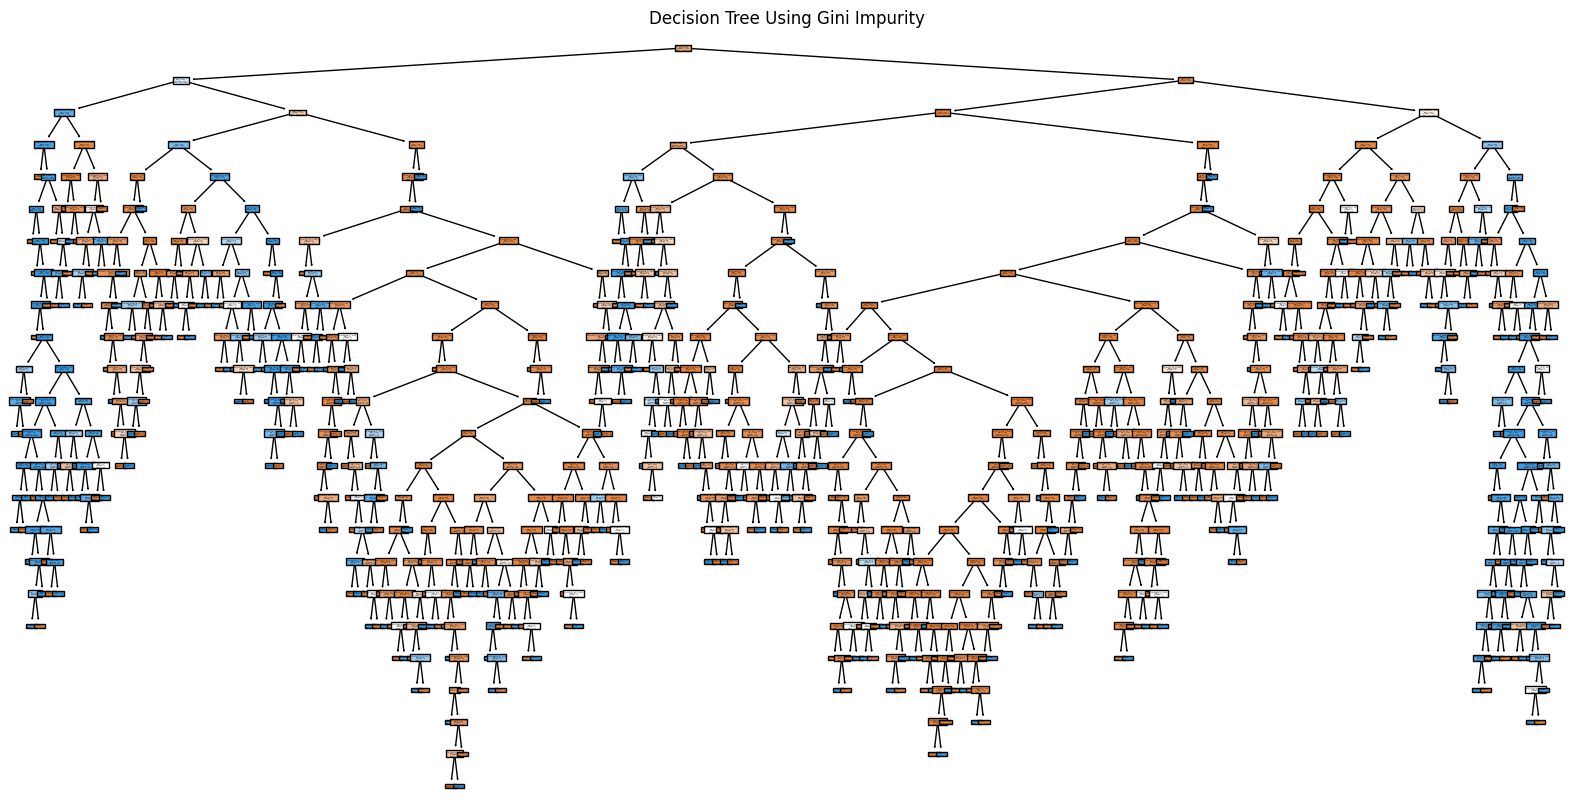

In [17]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf_gini, feature_names=X.columns, filled=True)
plt.title('Decision Tree Using Gini Impurity')
plt.show()

In [18]:
clf_gini_pruned = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf_gini_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [19]:
y_pred_gini = clf_gini_pruned.predict(X_test)
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2189
           1       0.95      0.92      0.94       661

    accuracy                           0.97      2850
   macro avg       0.96      0.95      0.96      2850
weighted avg       0.97      0.97      0.97      2850



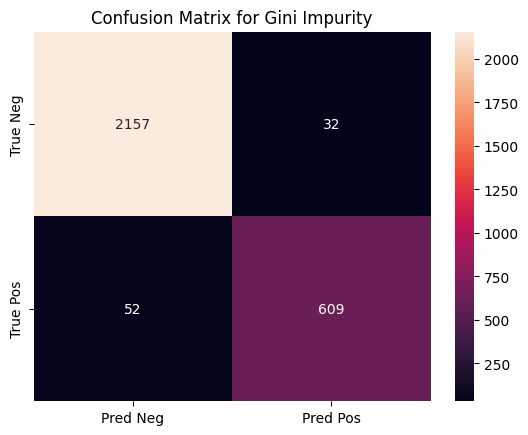

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred_gini)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True Neg', 'True Pos'], columns=['Pred Neg', 'Pred Pos'])

sns.heatmap(conf_matrix_df, annot=True, fmt='g')
plt.title('Confusion Matrix for Gini Impurity')
plt.show()

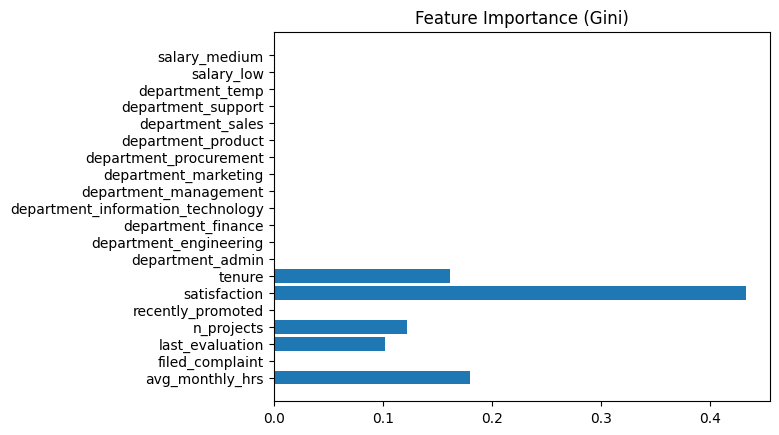

In [21]:
importances = clf_gini_pruned.feature_importances_
plt.barh(X.columns, importances)
plt.title('Feature Importance (Gini)')
plt.show()

*Inference:*<br>
*-From the above graph we can say that the features like tenure, satisfaction, n_projects, last_evaluation and avg_monthly_hrs are the important features.*

In [22]:
clf_entropy_pruned = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf_entropy_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [23]:
y_pred_entropy = clf_entropy_pruned.predict(X_test)
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2189
           1       0.96      0.92      0.94       661

    accuracy                           0.97      2850
   macro avg       0.97      0.96      0.96      2850
weighted avg       0.97      0.97      0.97      2850



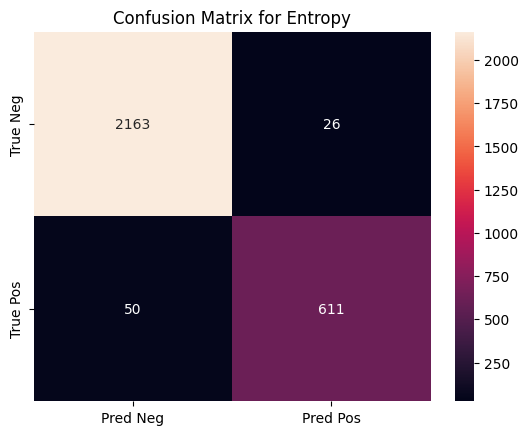

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred_entropy)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True Neg', 'True Pos'], columns=['Pred Neg', 'Pred Pos'])

sns.heatmap(conf_matrix_df, annot=True, fmt='g')
plt.title('Confusion Matrix for Entropy')
plt.show()

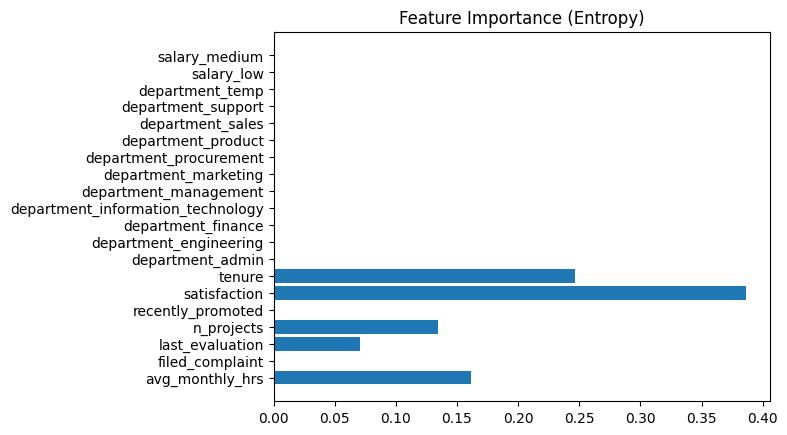

In [25]:
importances = clf_entropy_pruned.feature_importances_
plt.barh(X.columns, importances)
plt.title('Feature Importance (Entropy)')
plt.show()

*Inference:*<br>
*-From the above graph we can say that the features like tenure, satisfaction, n_projects, last_evaluation and avg_monthly_hrs are the important features.*

In [26]:
data=tree.export_graphviz(clf_gini_pruned,feature_names=X.columns,filled=True)
graph=graphviz.Source(data)
graph.render("DesTree_Gini")

'DesTree_Gini.pdf'

In [27]:
data=tree.export_graphviz(clf_entropy_pruned,feature_names=X.columns,filled=True)
graph=graphviz.Source(data)
graph.render("DesTree_Entropy")

'DesTree_Entropy.pdf'